In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn  as sns
%matplotlib inline

In [2]:
# importing dataset
df = pd.read_csv("data/car-data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
# checking unique values
df["Seller_Type"].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [4]:
df["Transmission"].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [5]:
df["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [6]:
# checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
# checking null values
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [8]:
# creating new column current year
df["current_year"] = 2020

In [9]:
# creating car-age column
df["car_age"] = df["current_year"] - df["Year"]

In [10]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,car_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [11]:
# removing year, current_year, and car_name columns
df.drop(["Year", "current_year", "Car_Name"], axis=1, inplace=True)

In [12]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [13]:
# creating dummies
df = pd.get_dummies(df, drop_first=True)

In [14]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


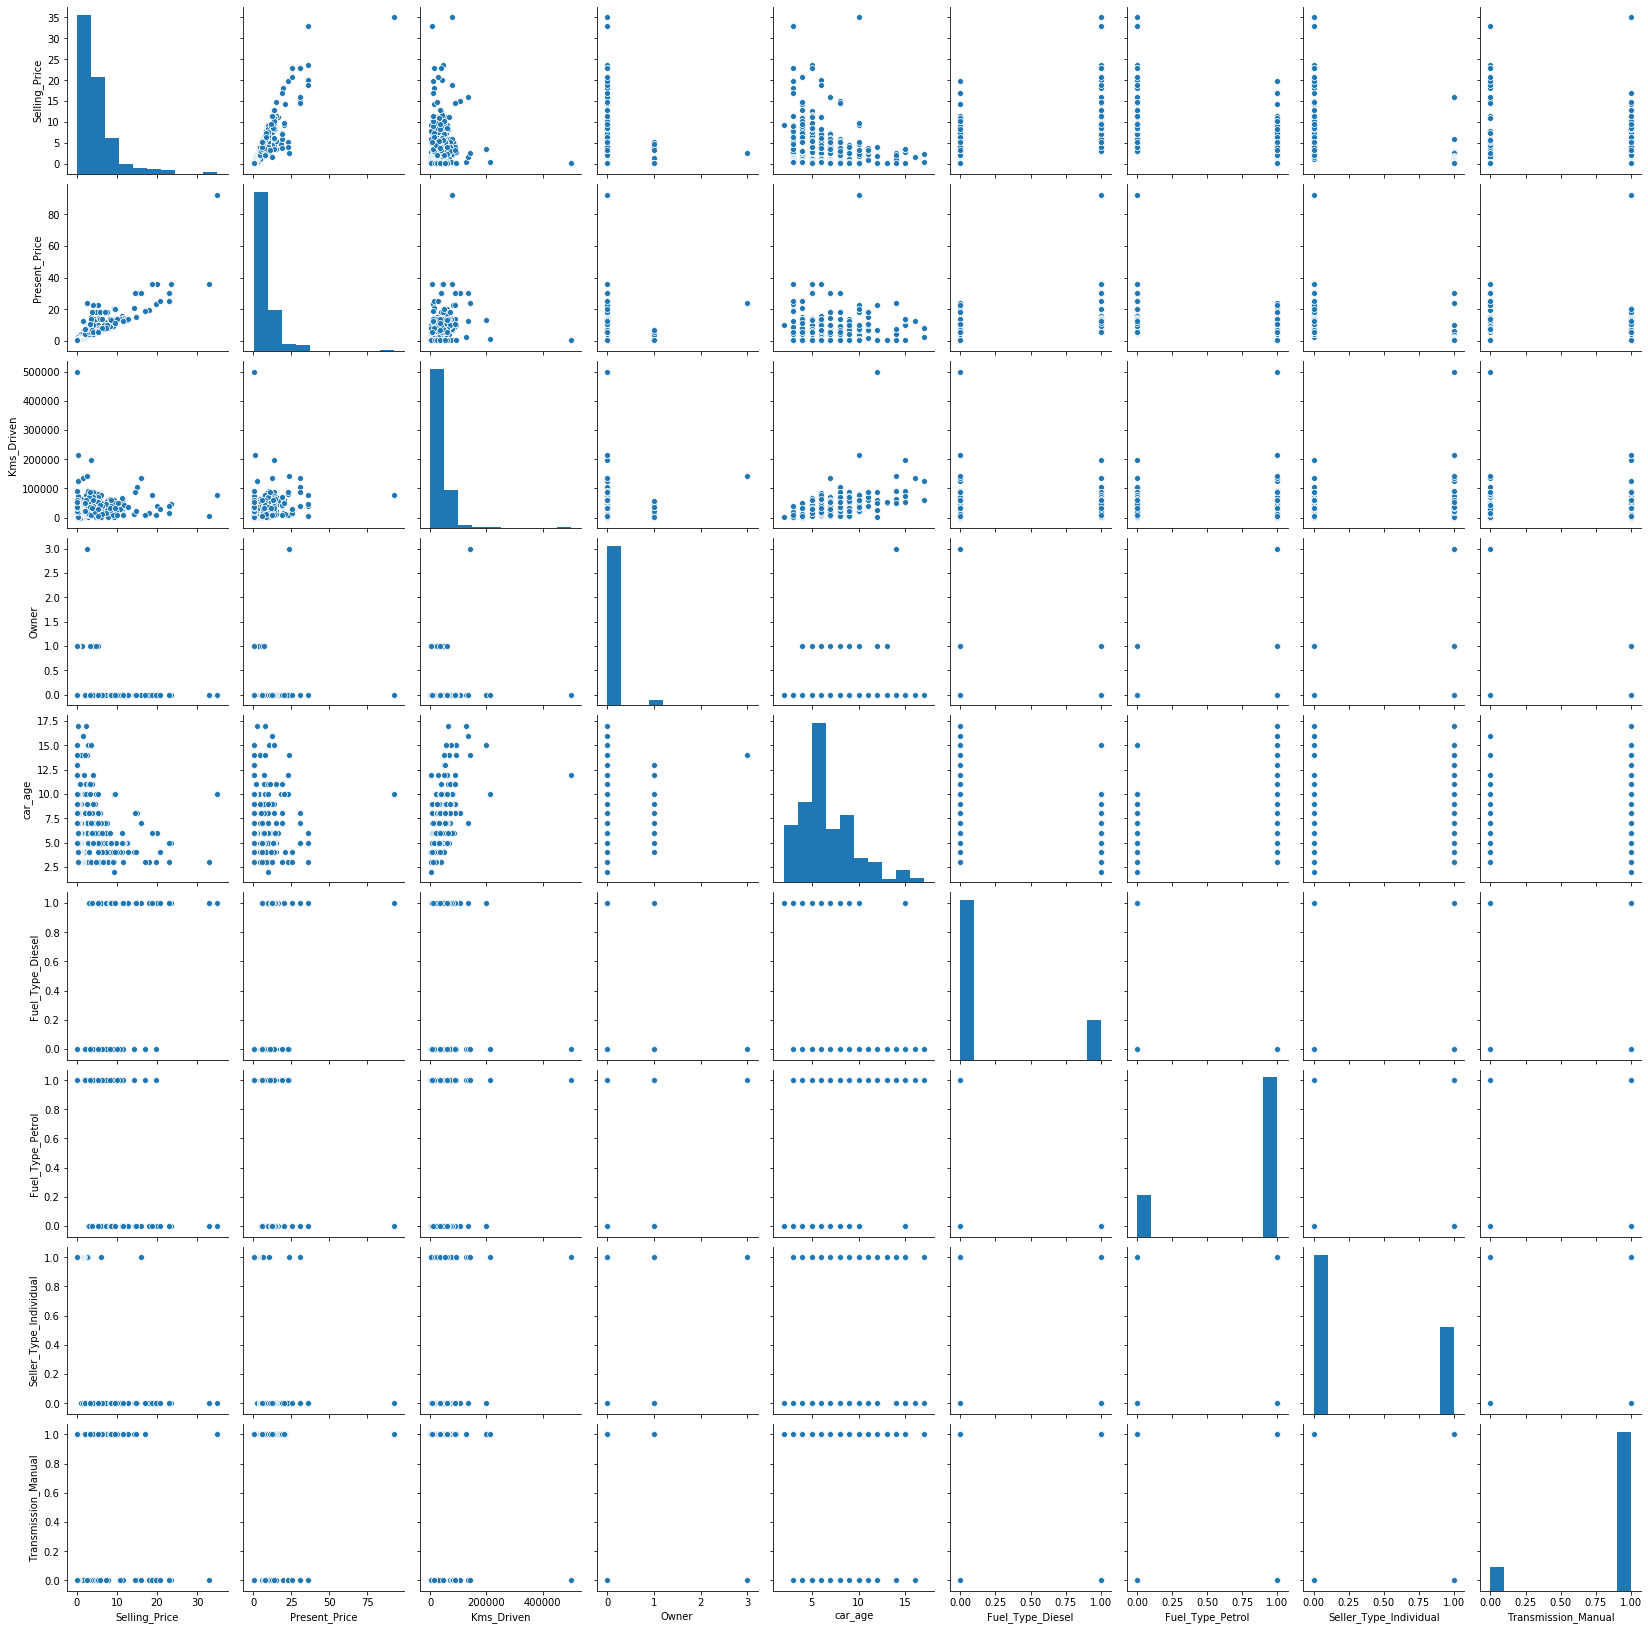

In [15]:
sns.pairplot(df);

In [16]:
# importing randomforest
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [17]:
# spliting data
X = df.drop("Selling_Price", axis=1)
y =df["Selling_Price"]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# model training
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [20]:
model.score(X_test, y_test)

0.9590527120780266

In [21]:
import pickle

# creating pickle file for model
pickle.dump(model, open("car-dekho-price-prediction.pkl", "wb"))